## ML4DS Lab: Week 3: Classification Part 1.

### Aims:
    * Practice K-Nearest Neighbour.
    * Practice Logistic Regression.
    * Compare classifiers with ROC and AUC.


### Task 1: K - Nearest Neighbours

#### Task 1.1: Import and load the data:

In [3]:
import warnings
warnings.filterwarnings('ignore')

[[ 6.2  4.7]
 [ 6.   4.6]
 [ 5.8  4.3]
 [ 5.9  4.3]
 [ 5.8  4. ]
 [ 9.   9.4]
 [ 9.2  9.2]
 [ 9.6  9.2]
 [ 7.5  9.2]
 [ 6.7  7.1]
 [ 7.   7.4]
 [ 7.1  7.5]
 [ 7.8  8. ]
 [ 7.2  7. ]
 [ 7.5  8.1]
 [ 7.6  7.8]
 [ 7.1  7.9]
 [ 7.1  7.6]
 [ 7.3  7.3]
 [ 7.2  7.8]
 [ 6.8  7.4]
 [ 7.1  7.5]
 [ 7.6  8.2]
 [ 7.2  7.2]
 [ 7.2 10.3]
 [ 7.3 10.5]
 [ 7.2  9.2]
 [ 7.3 10.2]
 [ 7.3  9.7]
 [ 7.3 10.1]
 [ 5.8  8.7]
 [ 6.   8.2]
 [ 6.   7.5]
 [ 5.9  8. ]
 [ 6.   8.4]
 [ 6.1  8.5]
 [ 6.3  7.7]
 [ 5.9  8.1]
 [ 6.5  8.5]
 [ 6.1  8.1]]


Text(0, 0.5, 'Height')

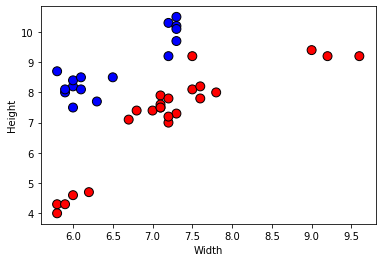

In [75]:
import numpy as np
%matplotlib inline
import pylab as plt
from matplotlib.colors import ListedColormap

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Load the orange and lemon data in the txt file.

data = np.loadtxt('orange_lemon.txt', delimiter=',')
X = data[:,1:3]
print(X)
t = data[:,0]

# Plot data.

plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=80)
plt.xlabel('Width')
plt.ylabel('Height')

#### Task 1.2: Test K-NN with orange and lemon data.

In [76]:
# This cell creates a 2-d grid of points
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


Text(0.5, 1.0, 'KNN (k = 40)')

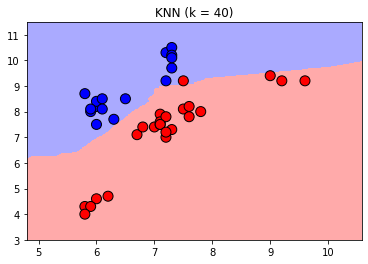

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X, t)

Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k = %i)"
          % (n_neighbors))
# Train K-NN using orange and lemon data, test on the created mesh grid:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# Plot the results.
# You need pcolormesh to plot the colored mesh 
# reference: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.pcolormesh.html

#### Task 1.3: Use cross-validation to determine the number of neighbours.

0.022222222222222143


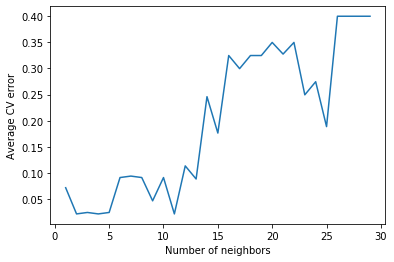

In [78]:

# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# Try different range of possible number of neighbors.

cv_scores = []
for i in range(1,30,1):
    knn_cv = KNeighborsClassifier(n_neighbors=i)
    cv_scores.append(1-np.mean(cross_val_score(knn_cv, X, t, cv=5)))
    
plt.plot(np.arange(1,30,1),cv_scores)
plt.xlabel('Number of neighbors')
plt.ylabel('Average CV error')
print(np.min(cv_scores))
#sklearn.model_selection.cross_val_score(estimator, X, y=None)

Text(0.5, 1.0, 'KNN (k = 40)')

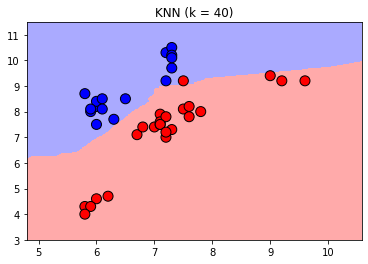

In [79]:
# Try out different number different number of neighbors, check when do you loss one of your classes

neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X, t)

Z = neigh.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k = %i)"
          % (n_neighbors))

#### Task 1.4: Try out the 'weight' parameter:
Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Text(0.5, 1.0, 'KNN (k = 40)')

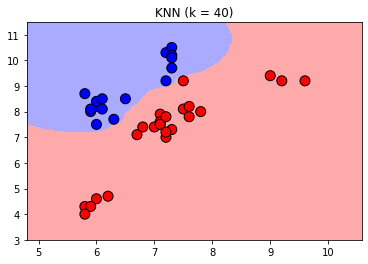

In [80]:
# K-NN has a weight paramenter, see if it can rescue the classification.
n_neighbors = 40
clf = KNeighborsClassifier(n_neighbors, weights="distance")
clf.fit(X, t)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("KNN (k = %i)" % (n_neighbors))

### Task 2: Logistic Regression.

#### Task 2.1: Train a Logistic Regression classifier with orange and lemon data

5-fold averae CV error: 0.025000000000000022


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

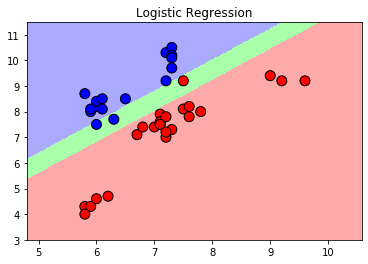

In [81]:
from sklearn.linear_model import LogisticRegression
# Plot the probabilities 
# Also check the CV error
clf = LogisticRegression().fit(X, t)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold,
            edgecolor='k', s=100)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression")
mean_cv_score = np.mean( cross_val_score(clf, X, t, cv=5) )
print("5-fold averae CV error:", 1-mean_cv_score)

#### Task 2.2: Train a  L2 Regularised Logistic Regression.

In [82]:
# define a range of different strength of regularisation 
from sklearn.svm import l1_min_c
from sklearn.model_selection import GridSearchCV
cs = l1_min_c(X, t, loss='log')*np.logspace(0, 7, 16)
print(cs)

[2.89435601e-02 8.47653998e-02 2.48247728e-01 7.27029358e-01
 2.12921058e+00 6.23570098e+00 1.82621518e+01 5.34833516e+01
 1.56633727e+02 4.58724513e+02 1.34344105e+03 3.93446133e+03
 1.15226388e+04 3.37457135e+04 9.88292004e+04 2.89435601e+05]


5-fold averae CV error: 0.025000000000000022


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

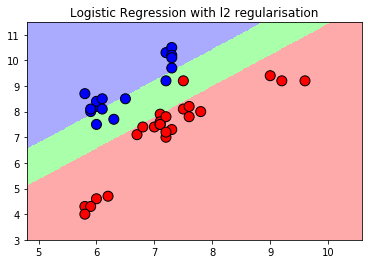

In [83]:
# Use GridSearchCV to find the optimal regularisation strength, 
# fit the corresponding L2 regularised logistic regression model, 
# plot the classification result,
# and check the CV error
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
parameters = {'C':cs}
logit_reg =  LogisticRegression(penalty='l2', tol=1e-5, max_iter=1e4)
clf = GridSearchCV(logit_reg, parameters, cv=5)
clf.fit(X,t)

Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape) # Put the result into a color plot
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=cmap_bold, edgecolor='k', s=100) # Plot also the training points
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Logistic Regression with l2 regularisation")
print("5-fold averae CV error:", 1-clf.best_score_)

### Task 3: Compare classifiers with ROC and AUC.

#### Task 3.1: ROC and AUC on Logistic Regression

In [84]:
# Here we use a different dataset
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()
X = breast_cancer.data
t = breast_cancer.target



Use the `train_test_split` function to create a training and testing split. The figures are produced with 'random_state=123'

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


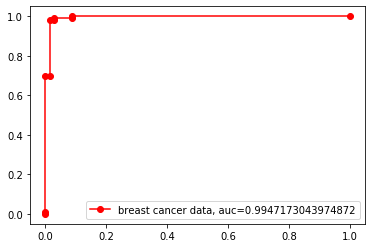

In [85]:
# Plot the ROC curve for a Logistic Regression classifier with your training and test data,
# Also compute the AUC
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
X_train, X_test, y_train, y_test = train_test_split(X,t,test_size=0.30, random_state=123)
clf1 = LogisticRegression().fit(X_train, y_train)

y_pred1 = clf1.predict(X_test)
y_pred_proba1 = clf1.predict_proba(X_test)[:,1]
fpr1, tpr1, _ = metrics.roc_curve(y_test,  y_pred_proba1)
auc1 = metrics.roc_auc_score(y_test, y_pred_proba1)
plt.plot(fpr1,tpr1,'ro-',label="breast cancer data, auc="+str(auc1))
plt.legend(loc=4)
plt.show()

#### Task 3.2: ROC and AUC on K-Nearest Neighbours.

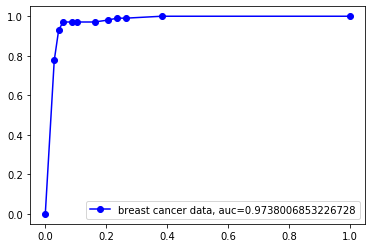

In [86]:
# Plot the ROC curve for a KNN classifier with your training and test data,
# Also compute the AUC
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
clf2 = KNeighborsClassifier(10).fit(X_train, y_train)

y_pred2 = clf2.predict(X_test)
y_pred_proba2 = clf2.predict_proba(X_test)[:,1]
fpr2, tpr2, _ = metrics.roc_curve(y_test,  y_pred_proba2)
auc2 = metrics.roc_auc_score(y_test, y_pred_proba2)
plt.plot(fpr2,tpr2,'bo-',label="breast cancer data, auc="+str(auc2))
plt.legend(loc=4)
plt.show()

#### Task 3.3: Comparison of Logistic Regression and K-NN ROCs.

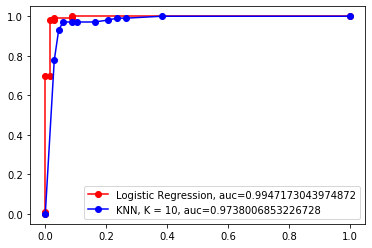

In [87]:
# Overlay the two ROC curves
plt.plot(fpr1,tpr1,'ro-',label="Logistic Regression, auc="+str(auc1))
plt.plot(fpr2,tpr2,'bo-',label="KNN, K = 10, auc="+str(auc2))
plt.legend(loc=4)
plt.show()

#### Task 3.4: Run cross validation using AUC as performance metric for the two classifiers 